In [2]:
import pandas as pd
import numpy as np
import sklearn
from IPython.display import display
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import os
from IPython.core.display import display, HTML
import seaborn as sns
import sys
import os

/tmp/ipykernel_98537/2947062357.py:8: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


In [3]:
sys.path.append(os.path.abspath("NONAN_Library_main/python"))
from LyE_W import LyE_W
sampling_rate = 200

/home/dmartinez/Documentos/Di_Inv/NONAN_Library_main/python/LyE_W.py:183: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(cosTheta)


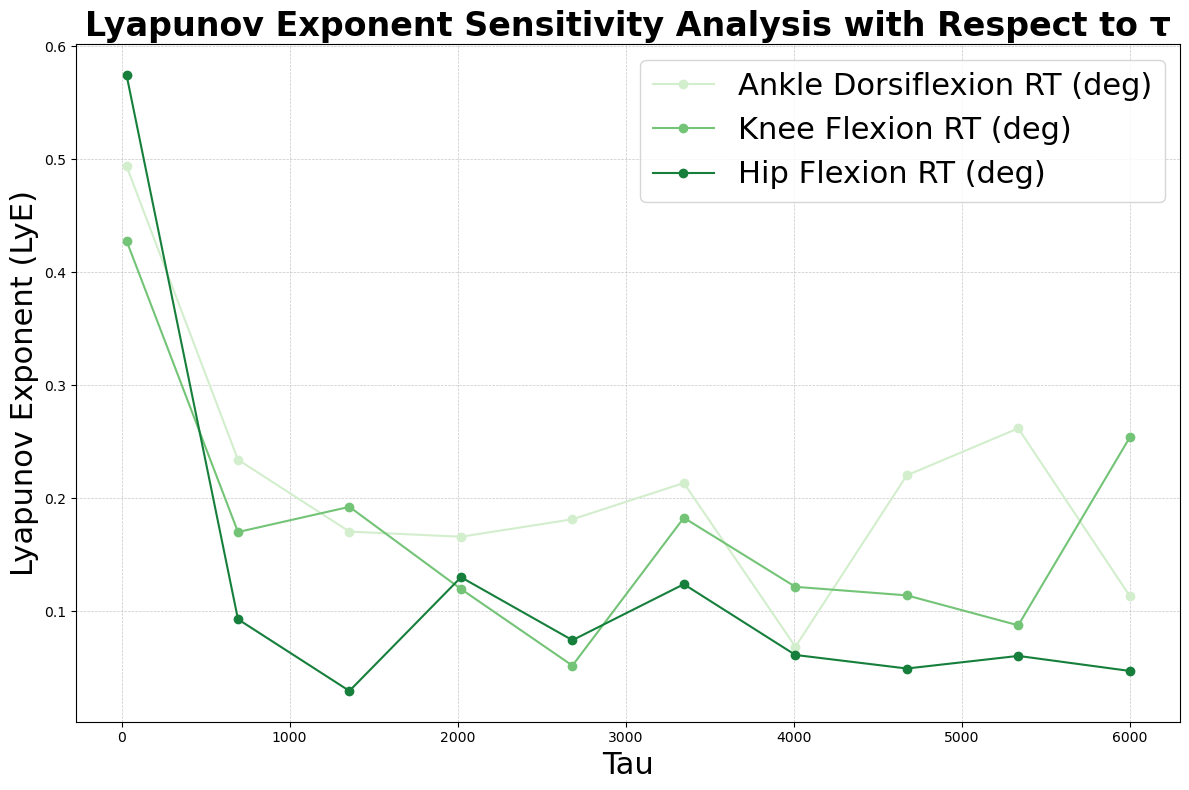

In [11]:
#Analysis for Young adults (19–35 years old)
nombre_archivo = 'young adults (19–35 years old)/S002/S002_G01_D01_B01_T01.csv'
file_path = os.path.join(os.getcwd(), nombre_archivo)
dat = pd.read_csv(file_path)
df = pd.DataFrame(dat)
# Variables para el análisis
variables = ['Ankle Dorsiflexion RT (deg)', 'Knee Flexion RT (deg)', 'Hip Flexion RT (deg)']
LyE_results = {var: [] for var in variables}

# Parámetros de análisis
evolve = int(5 * sampling_rate)  # Número de intervalos de muestra
dE = 5  # Dimensión de embebimiento identificada con FNN
taus = np.linspace(30, 6000, 10, dtype=int)  # Valores de tau para explorar

# Realizar el análisis de Lyapunov para cada variable
for var in variables:
    data = df[var].values.flatten()  # Convertir a un arreglo 1D
    for tau in taus:
        out, LyE_v = LyE_W(data, sampling_rate, tau, dE, evolve)
        LyE_results[var].append({"Tau": tau, "Lyapunov Exponent": LyE_v})

# Convertir los resultados en DataFrames
LyE_dfs = {var: pd.DataFrame(LyE_results[var]) for var in variables}

# Colores personalizados en escala de verdes (usando `plt.cm.Greens` para crear un gradiente)
colors = plt.cm.Greens(np.linspace(0.2, 0.8, len(variables)))  # Creación de colores en verde

# Graficar los resultados
plt.figure(figsize=(12, 8))

# Graficar cada variable
for i, var in enumerate(variables):
    # Graficar la línea para cada variable
    plt.plot(LyE_dfs[var]['Tau'], LyE_dfs[var]['Lyapunov Exponent'], label=var, color=colors[i], linestyle='-', marker='o', markersize=6)
    
    # Encontrar el índice donde tau = 1000
    tau_1000_index = np.where(LyE_dfs[var]['Tau'] == 1000)[0]
    
    # Asegurarse de que tau_1000_index no esté vacío (es decir, que tau = 1000 esté presente en la lista de tau)
    if len(tau_1000_index) > 0:
        tau_1000 = LyE_dfs[var]['Tau'].iloc[tau_1000_index[0]]
        LyE_at_1000 = LyE_dfs[var]['Lyapunov Exponent'].iloc[tau_1000_index[0]]
        
        # Marcar el punto en tau = 1000
        plt.scatter(tau_1000, LyE_at_1000, color=colors[i], s=100, zorder=5)  # Resaltar con un punto más grande
        plt.text(tau_1000, LyE_at_1000, f'({tau_1000}, {LyE_at_1000:.2f})', fontsize=14, ha='right', va='bottom', color=colors[i])

# Agregar título, etiquetas y leyenda
plt.xlabel('Tau', fontsize=22)  # Aumenté el tamaño de la letra en el eje X
plt.ylabel('Lyapunov Exponent (LyE)', fontsize=22)  # Aumenté el tamaño de la letra en el eje Y
plt.title('Lyapunov Exponent Sensitivity Analysis with Respect to τ', fontsize=24, fontweight='bold')  # Aumenté el tamaño del título
plt.legend(loc='upper right', fontsize=22)  # Aumenté el tamaño de la leyenda

# Mejorar la cuadrícula
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Ajustar el tamaño de la figura y mostrar
plt.tight_layout()

# Guardar el gráfico
plt.savefig('Lyapunov_Exponent_Sensitivity_Analysis_Young_Adult_Greens.png', dpi=300)

# Mostrar la gráfica
plt.show()

/home/dmartinez/Documentos/Di_Inv/NONAN_Library_main/python/LyE_W.py:183: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(cosTheta)


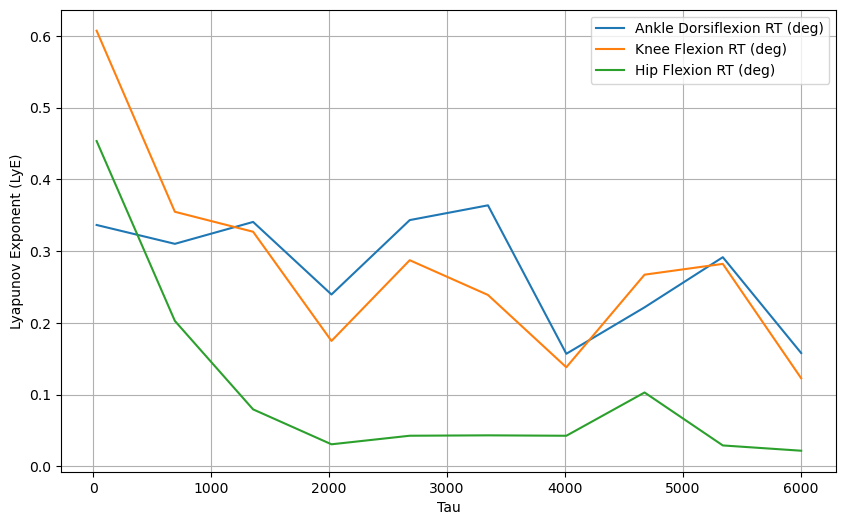

In [9]:
#Analysis for old adults (60–80 years old)
nombre_archivo = 'old adults (56+ years old)/S009/S009_G03_D01_B01_T01.csv'
file_path = os.path.join(os.getcwd(), nombre_archivo)
dat = pd.read_csv(file_path)
df = pd.DataFrame(dat)
# Variables para el análisis
variables = ['Ankle Dorsiflexion RT (deg)', 'Knee Flexion RT (deg)', 'Hip Flexion RT (deg)']
LyE_results = {var: [] for var in variables}
# Parámetros de análisis
evolve = int(5 * sampling_rate)  # Número de intervalos de muestra
dE = 5  # Dimensión de embebimiento identificada con FNN
taus = np.linspace(30, 6000, 10, dtype=int)  # Valores de tau para explorar
# Realizar el análisis de Lyapunov para cada variable
for var in variables:
    data = df[var].values.flatten()  # Convertir a un arreglo 1D
    for tau in taus:
        out, LyE_v = LyE_W(data, sampling_rate, tau, dE, evolve)
        LyE_results[var].append({"Tau": tau, "Lyapunov Exponent": LyE_v})
# Convertir los resultados en DataFrames
LyE_dfs = {var: pd.DataFrame(LyE_results[var]) for var in variables}
# Graficar los resultados
plt.figure(figsize=(10, 6))
for var in variables:
    plt.plot(LyE_dfs[var]['Tau'], LyE_dfs[var]['Lyapunov Exponent'], label=var)
plt.xlabel('Tau')
plt.ylabel('Lyapunov Exponent (LyE)')
#plt.title('Análisis de Sensibilidad del Lyapunov Exponent para diferentes variables')
plt.legend()
plt.grid(True)
plt.savefig('Lyapunov_Exponent_Sensitivity_Analysis_Old_Adult.png', dpi=300)
plt.show()

/home/dmartinez/Documentos/Di_Inv/NONAN_Library_main/python/LyE_W.py:183: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(cosTheta)
/tmp/ipykernel_98537/3962552397.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


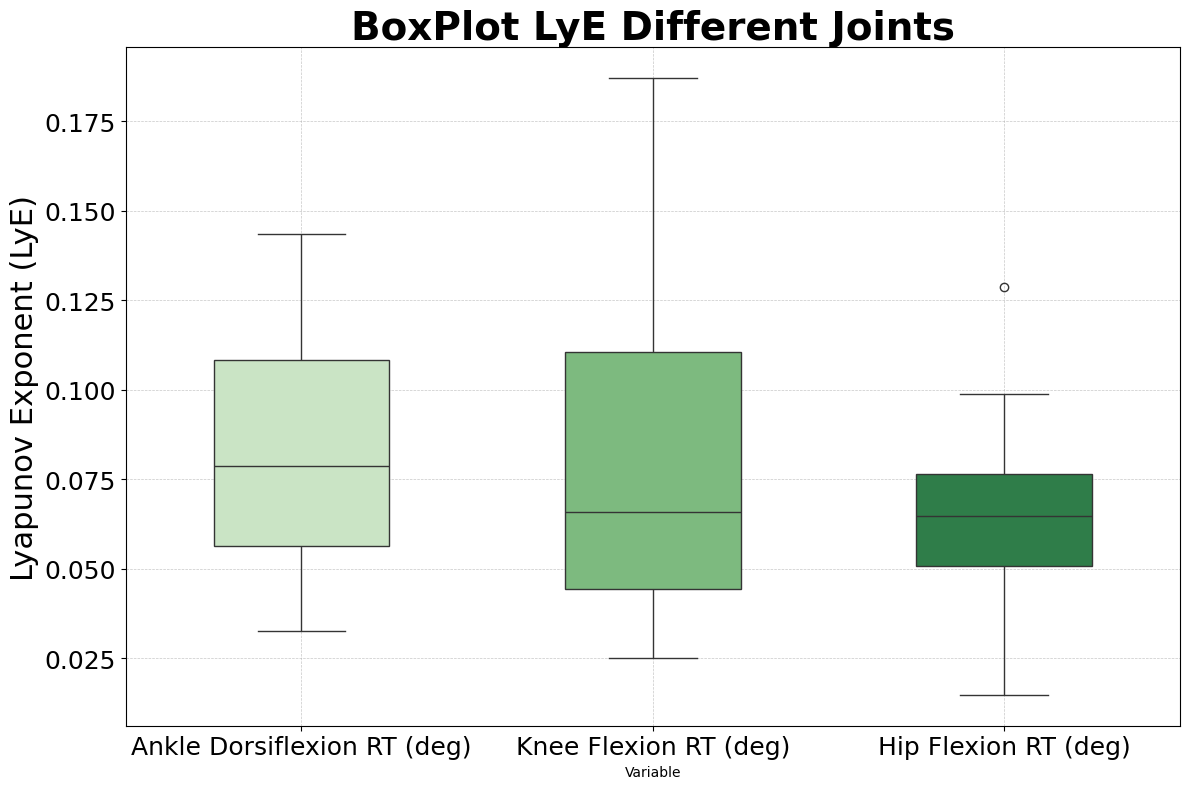

In [7]:
#To plot the Lyapunov Exponent for each joint at tau=1000
# Función para cargar los datos del paciente S002
def load_patient_data(patient_folder, patient_id):
    df_list = []
    file_list = []
    
    # Recorrer las diferentes tomas
    for d in ['D01', 'D02']:
        for b in ['B01', 'B02', 'B03']:
            for t in ['T01', 'T02', 'T03']:
                # Aquí se usa el patient_id para construir el nombre del archivo
                file_name = f"{patient_folder}/{patient_id}_G01_{d}_{b}_{t}.csv"
                if os.path.exists(file_name):
                    try:
                        df = pd.read_csv(file_name)
                        if df.empty:
                            print(f"Archivo vacío: {file_name}")
                            continue
                        df_list.append(df)
                        file_list.append(file_name)
                    except Exception as e:
                        print(f"Error al leer {file_name}: {e}")
                else:
                    print(f"Archivo no encontrado: {file_name}")
    return df_list, file_list

# Cargar los datos del paciente S002
patient_id = 'S002'  # Solo procesar el paciente S002
base_folder = "./young adults (19–35 years old)"  # Carpeta base donde están los pacientes
sampling_rate = 200
evolve = int(5 * sampling_rate)  # Número de intervalos de muestra
dE = 5  # Dimensión de embebimiento identificada con FNN
tau = 1000  # Rango de valores de tau

# Lista para almacenar los resultados de este paciente
patient_results = []

# Cargar los datos del paciente S002
patient_folder = os.path.join(base_folder, patient_id)
#print(f"Procesando datos para el paciente: {patient_id}")
df_list, file_list = load_patient_data(patient_folder, patient_id)

# Realizar el análisis de Lyapunov para cada variable y cada toma del paciente
for i, df in enumerate(df_list):
    trial_name = file_list[i]
    
    # Realizar el análisis de Lyapunov para cada variable y cada toma del paciente
    for var in ['Ankle Dorsiflexion RT (deg)', 'Knee Flexion RT (deg)', 'Hip Flexion RT (deg)']:
        data = df[var].values.flatten()  # Convertir a un arreglo 1D
        out, LyE_v = LyE_W(data, sampling_rate, tau, dE, evolve)
        patient_results.append({"Patient": patient_id, "Trial": trial_name, "Variable": var, "Tau": tau, "Lyapunov Exponent": LyE_v})

# Convertir los resultados en DataFrame
LyE_df = pd.DataFrame(patient_results)

# Graficar el Box Plot por cada variable para tau = 1000
plt.figure(figsize=(12, 8))

# Crear un box plot con Seaborn y el color personalizado usando la paleta 'Greens'
sns.boxplot(
    x="Variable",  # En el eje X se muestran las articulaciones
    y="Lyapunov Exponent",  # El eje Y muestra el Lyapunov Exponent
    data=LyE_df, 
    palette='Greens',  # Usar escala de verdes
    width=0.5  # Ajustar el ancho de los cuadros
)

# Mejorar la estética del gráfico
plt.title("BoxPlot LyE Different Joints", fontsize=28, fontweight='bold')
plt.ylabel("Lyapunov Exponent (LyE)", fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Mejorar la cuadrícula
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Ajuste de márgenes y diseño
plt.tight_layout()

# Guardar el gráfico
plt.savefig('BoxPlot_Lyapunov_Exponent_Patient_Joints_Greens.png', dpi=300)

# Mostrar la gráfica
plt.show()